In [108]:
#IMPORTAR LAS BIBLIOTECAS
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy.stats import randint
from math import sqrt
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from pandas import set_option
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
from sklearn.feature_selection import RFE              
# for feature selection
from sklearn.model_selection import KFold  
from sklearn.svm import SVR
from sklearn import linear_model

#Metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Calibracion
from sklearn.calibration import calibration_curve
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV

#Cross validation
from sklearn.model_selection import train_test_split as split

from sklearn.metrics import classification_report, confusion_matrix


In [57]:
##Cargar los datos del csv
rawData = pd.read_csv('nuevo.csv', header=1)

In [58]:
##Revisar la estructura de los datos
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
##Verificar los tipos de datos
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [75]:
variableName = rawData.iloc[1, 1]
variableName = rawData['LIMIT_BAL']
variableName = rawData.iloc[:,0:4]

In [94]:
#features
features = rawData.iloc[:,12:23]
print('Resumen de caracteristicas de los datos')
features.head()


Resumen de caracteristicas de los datos


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [79]:
######Definir la variable dependiente
depVar = rawData['PAY_AMT6']
depVar.head()


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [81]:
##Regresion: Establecemos el conjunto de entrenamiento para la variable x y entrenamiento
##seleccionamos 1000 caracteristicas

#Entrenamiento
X_train = (features[: 1000])  
X_train.head()



,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [82]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [83]:
# Conjunto de prueba (Prueba X) 
X_test = features[-100:] 
X_test_count = len(X_test.index) 
print ('El número de observaciones en el conjunto de prueba de características es:', str (X_test_count)) 
print (X_test.head())


El número de observaciones en el conjunto de prueba de características es: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [133]:
##Regression : Establecer la verdad
#Ground Truth (y_test)  
y_test = depVar[-100:] 
y_test_count = len(y_test.index) 
print ('El número de observaciones en el conjunto de entrenamiento Y son:', str(y_test_count)) 
y_test.head ()

El número de observaciones en el conjunto de entrenamiento Y son: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [140]:
display(HTML('<h2>Cross Validation</h2>'))
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

#shape function
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [141]:
display(HTML('<h2>Establecer Parametros y Definir los Modelos</h2>'))
model = LinearRegression(n_jobs=10)

In [142]:
###Creacion de modelos de regresion
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [143]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [144]:

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [145]:
display(HTML('<h3>Random Forest</h3>')) 
##Random Forest
modelRF.fit(X_train,y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [146]:
display(HTML('<h3>Support Vector Regression</h3>')) 
modelSVR.fit(X_train,y_train)
##modelLR.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
display(HTML('<h3>Linear Regression</h3>')) 
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
display(HTML('<h2>Seleccionar el mejor modelo</h2>')) 
print(cross_val_score(modelRF, X_train, y_train))

[-0.2056905  -0.09796086 -0.55298356]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [149]:
model.score(X_train,y_train)

0.6146658267674057

In [150]:
display(HTML('<h3>Random Forest Regression Model Fitting and Scoring</h3>')) 

#Model Fitting
modelRF.fit(X_train,y_train)

print(cross_val_score(modelRF, X_train, y_train))

modelRF.score(X_train,y_train)

[-0.1675605  -0.05497017 -0.35452776]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7672824321989871

In [151]:
display(HTML('<h3>Support Vector Regression Model Fitting and Scoring</h3>'))

modelSVR.fit(X_train,y_train)

print(cross_val_score(modelSVR, X_train, y_train)) 

modelSVR.score(X_train,y_train)

[-0.05166222 -0.0237862  -0.05416496]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto'

-0.02327886705743798

In [152]:
display(HTML('<h3>Linear Regression Model Fitting and Scoring</h3>'))

modelLR.fit(X_train,y_train)

print(cross_val_score(modelLR, X_train, y_train)) 

modelLR.score(X_train,y_train)

[-0.4507689  -0.00838939 -5.18598469]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6146658267674057

In [153]:
display(HTML('<h1>Hacer las predicciones y evaluar los resultados</h1>'))

In [154]:
display(HTML('<h2>Hacer la predlicción</h2>'))

predictions = modelRF.predict(X_test)

In [155]:
display(HTML('<h2>Evaluar el resultado</h2>'))

rmse = sqrt(mean_squared_error(y_test, predictions))

print(rmse)

12207.22300705101


In [156]:
predRsquared = r2_score(y_test, predictions)

print(predRsquared)

-3.791676371399814


In [157]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -3.792
RMSE: 12207.223


In [158]:
display(HTML('<h2>Plotting the Results</h2>'))

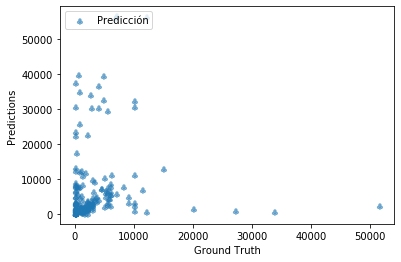

In [169]:
np.random.seed(19680801)


x = y_test
s = predictions

plt.scatter(x,  s, alpha=0.5, marker=r'$\clubsuit$',
            label="Predicción")
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.show()

In [63]:
display(HTML('<h1>----------------------Clasificacion--------------</h1>'))

In [115]:
data = pd.read_csv('nuevo.csv', header = 1)
data.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
18971,18972,210000,2,1,2,28,0,-1,0,0,...,41291,10623,10765,6942,24000,22000,20000,5000,3000,0
24333,24334,20000,1,3,2,45,1,-1,-1,-1,...,780,0,0,780,0,780,0,0,0,0
29124,29125,20000,2,3,2,56,0,0,0,2,...,14426,14526,15026,1214,3100,0,500,500,0,0
5238,5239,380000,1,1,1,32,0,0,0,0,...,31136,28839,14584,30307,5044,5036,5081,2022,2026,0
3850,3851,50000,1,1,1,50,1,2,0,0,...,29422,12856,0,1521,1345,2074,238,0,0,1


In [116]:
display(HTML('<h3>Feature engineering</h3>'))

In [117]:
data.rename(columns = {"default payment next month": "Default"}, inplace = True)
data.drop('ID', axis = 1, inplace = True) # drop column "ID"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [118]:
#Eliminando columnas
data = data.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)

In [119]:
# covarianza
np.cov(data) 

array([[6.66267539e+07, 3.99858094e+08, 2.99883459e+08, ...,
        9.99414697e+07, 2.66555485e+08, 1.66582838e+08],
       [3.99858094e+08, 2.39973610e+09, 1.79974114e+09, ...,
        5.99795147e+08, 1.59972416e+09, 9.99741185e+08],
       [2.99883459e+08, 1.79974114e+09, 1.34976018e+09, ...,
        4.49831196e+08, 1.19975255e+09, 7.49780580e+08],
       ...,
       [9.99414697e+07, 5.99795147e+08, 4.49831196e+08, ...,
        1.49914214e+08, 3.99838571e+08, 2.49877602e+08],
       [2.66555485e+08, 1.59972416e+09, 1.19975255e+09, ...,
        3.99838571e+08, 1.06641626e+09, 6.66452632e+08],
       [1.66582838e+08, 9.99741185e+08, 7.49780580e+08, ...,
        2.49877602e+08, 6.66452632e+08, 4.16497005e+08]])

In [122]:
#Categorizando las variables
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['MARRIAGE'] = data['MARRIAGE'].astype('category')
data['SEX'] = data['SEX'].astype('category')

# Se crean compartimentos para la EDAD, usando la funcion cut de pandas, se definen los compartimentos deseados unidades de 10.
data['edad_bins'] = pd.cut(data['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]).cat.codes
# Se crean compartimentos para la LIMIT_BALL, usando la funcion cut de pandas, se definen
#los compartimentos deseados en unidades de 100mil.
data['limiteCredito_bins'] = pd.cut(data['LIMIT_BAL'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]).cat.codes

data['Default'] = data['Default'].astype('category')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
LIMIT_BAL             30000 non-null int64
SEX                   30000 non-null category
EDUCATION             30000 non-null category
MARRIAGE              30000 non-null category
AGE                   30000 non-null int64
Default               30000 non-null category
edad_bins             30000 non-null int8
limiteCredito_bins    30000 non-null int8
dtypes: category(4), int64(2), int8(2)
memory usage: 645.4 KB


In [124]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Default,edad_bins,limiteCredito_bins
0,20000,2,2,1,24,1,2,0
1,120000,2,2,2,26,1,2,1
2,90000,2,2,2,34,0,3,0
3,50000,2,2,1,37,0,3,0
4,50000,1,2,1,57,0,5,0


In [128]:
#Variable Dependiente
varDep = data['Default']

In [129]:
#Entrenamiento
X_train = data.loc[:,['EDUCATION','MARRIAGE','SEX','edad_bins','limiteCredito_bins']]
X_train.shape


(30000, 5)

In [130]:
#Dependent Variable Training Set (y Training)
y_train = varDep
y_train.shape

(30000,)

In [131]:
X_train, X_test, y_train, y_test = split(X_train,y_train)

In [132]:
X_train.shape,X_test.shape

((22500, 5), (7500, 5))

In [133]:
y_train.shape, y_test.shape

((22500,), (7500,))

In [134]:
display(HTML('<h1>-----------Modelos de Clasificacion--------------</h1>'))

In [135]:
### Randon Forest

from sklearn.ensemble import RandomForestClassifier

mdl_RF = RandomForestClassifier(n_estimators=500, max_depth=5)

mdl_RF.fit(X_train, y_train)
pred_RF = mdl_RF.predict(X_test)
print ("RF exactitud: ",accuracy_score(y_test, pred_RF))

RF exactitud:  0.7797333333333333


In [136]:
mdl_RF.score(X_train, y_train)

0.7784888888888889

In [137]:
#K-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

mdl_knn = KNeighborsClassifier(n_neighbors=5)
mdl_knn = mdl_knn.fit(X_train, y_train)
pred_knn = mdl_knn.predict(X_test)

print ("KNN exactitud: ",accuracy_score(y_test, pred_knn))

KNN exactitud:  0.7516


In [138]:
mdl_knn.score(X_train, y_train)

0.756

In [139]:
#RandomForest con n_estimators=500, max_depth=5 tiene el mejor desempeño con una exactitud de 0.77

In [140]:
 display(HTML('<h1>Linear SVC - subclass of SVM. C stands for classification</h1>'))
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create the Linear SVC object
svc_model = LinearSVC(random_state=0, max_iter = 2000)

pred = svc_model.fit(X_train, y_train).predict(X_test)
print("LinearSVC model accuracy : ",accuracy_score(y_test, pred, normalize = True))
 


LinearSVC model accuracy :  0.7797333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [141]:
display(HTML('<h1>Modelo Gaussian</h1>'))
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
# create the Naive bayes object
gnb_model = GaussianNB()

pred = gnb_model.fit(X_train, y_train).predict(X_test)
print("NaiveBayes model accuracy : ",accuracy_score(y_test, pred, normalize = True))

NaiveBayes model accuracy :  0.7798666666666667


In [142]:
display(HTML('<h1>Matriz de confusion</h1>'))
confusion_matrix = confusion_matrix(y_test, pred_knn)
print(confusion_matrix)

[[5524  324]
 [1539  113]]


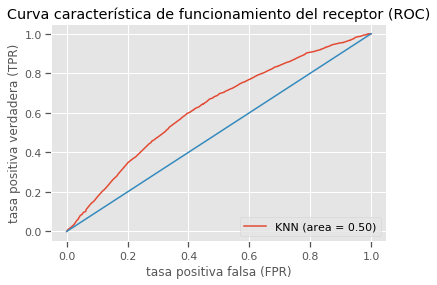

In [143]:
#Curva característica de funcionamiento del receptor o curva ROC, 
#se aplica para poder visualizar la capacidad de diagnóstico del clasificador a KNN 
#a medida que varia su umbral de discriminacion.
#La curva ROC se crea trazando la tasa positiva verdadera (TPR) contra la tasa positiva falsa (FPR)
#en varios ajustes de umbral. 
#La tasa positiva verdadera también se conoce como sensibilidad o probabilidad de detección. 
#La tasa de falsos positivos también se conoce como probabilidad de falsa alarma
#y se puede calcular como (1 - especificidad)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, mdl_RF.predict(X_test))


fpr, tpr,thresholds = roc_curve(y_test, mdl_RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('tasa positiva falsa (FPR)')
plt.ylabel('tasa positiva verdadera (TPR)')
plt.title('Curva característica de funcionamiento del receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

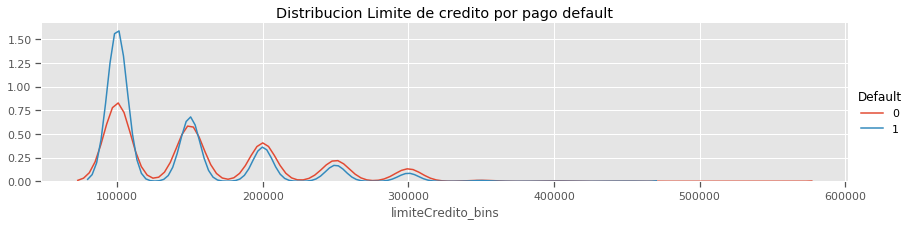

In [144]:
# Distribucion Limite de credito por pago default
limiteDist = sns.FacetGrid(data, hue='Default', aspect=4)
limiteDist.map(sns.kdeplot, 'limiteCredito_bins')
limiteDist.set(title='Distribucion Limite de credito por pago default')

bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
labels = [i for i in bins]
limiteDist.set_xticklabels( labels)
limiteDist.add_legend()
limiteDist.savefig('limiteDist')


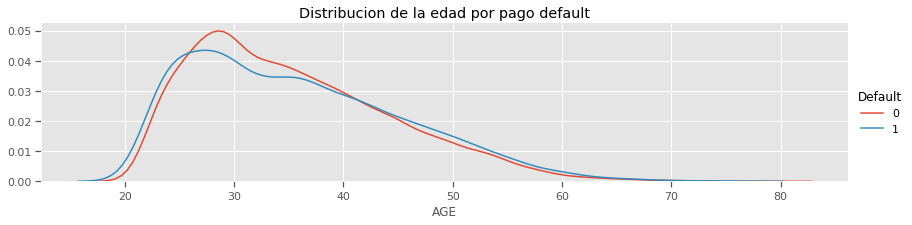

In [145]:
# Distribucion de la edad por pago default 
edadDist = sns.FacetGrid(data, hue='Default', aspect=4)
edadDist.map(sns.kdeplot, 'AGE')
edadDist.set(title='Distribucion de la edad por pago default')
edadDist.add_legend()
edadDist.savefig('edadDist')

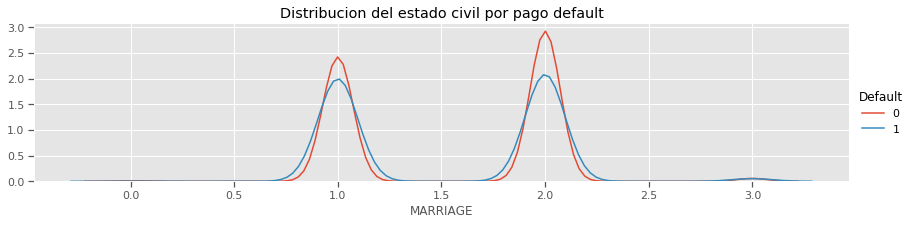

In [146]:
# Distribucion del estado civil por pago default 
edadDist = sns.FacetGrid(data, hue='Default', aspect=4)
edadDist.map(sns.kdeplot, 'MARRIAGE')
edadDist.set(title='Distribucion del estado civil por pago default')
edadDist.add_legend()
edadDist.savefig('MARRIAGE')

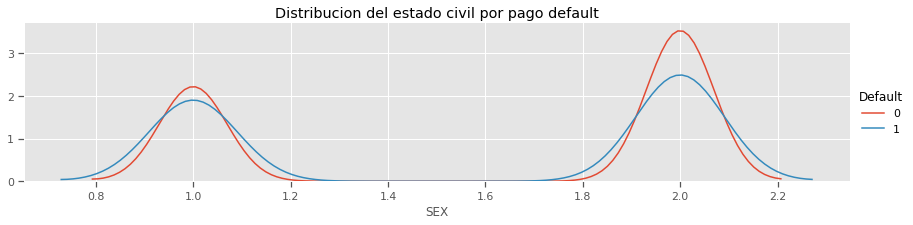

In [149]:
# Distribucion del GENERO por pago default 
edadDist = sns.FacetGrid(data, hue='Default', aspect=4)
edadDist.map(sns.kdeplot, 'SEX')
edadDist.set(title='Distribucion del estado civil por pago default')
edadDist.add_legend()
edadDist.savefig('SEX')